In [1]:
!nvidia-smi

Mon Jan 30 00:55:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.02       Driver Version: 528.02       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   55C    P0    24W /  87W |   1253MiB /  8192MiB |     13%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#Clear unnecessary memory
from tensorflow.keras import backend as K
import tensorflow as tf
K.clear_session()

In [3]:
# from tensorflow.keras.utils import plot_model
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import *
import tensorflow as tf

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
w, h = 32, 32
train_images = train_images.reshape(train_images.shape[0], w, h, 3)
test_images = test_images.reshape(test_images.shape[0], w, h, 3)

In [7]:
classess = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
classess_text = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',\
         'frog', 'horse', 'ship', 'truck']

In [8]:
base_model = tf.keras.applications.MobileNet(include_top=False)

base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(32, 32, 3), name="input_layer")
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(len(classess), activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, None, None, 1024)  3228864   
_________________________________________________________________
global_average_pooling_layer (None, 1024)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                10250     
Total params: 3,239,114
Trainable params: 10,250
Non-trainable params: 3,228,864
_________________________________________________________________


In [10]:
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [11]:
history = model.fit(train_images, 
                    train_labels,
                    batch_size = 256,
                    validation_split=0.15,
                    epochs = 30
)

Epoch 1/30
167/167 [==============================] - 11s 14ms/step - loss: 2.2634 - accuracy: 0.1614 - val_loss: 2.2345 - val_accuracy: 0.1893
Epoch 2/30
167/167 [==============================] - 2s 9ms/step - loss: 2.2200 - accuracy: 0.1903 - val_loss: 2.2041 - val_accuracy: 0.1999
Epoch 3/30
167/167 [==============================] - 2s 9ms/step - loss: 2.1979 - accuracy: 0.1972 - val_loss: 2.1871 - val_accuracy: 0.1985
Epoch 4/30
167/167 [==============================] - 2s 9ms/step - loss: 2.1856 - accuracy: 0.1998 - val_loss: 2.1775 - val_accuracy: 0.2001
Epoch 5/30
167/167 [==============================] - 2s 9ms/step - loss: 2.1779 - accuracy: 0.2026 - val_loss: 2.1720 - val_accuracy: 0.1968
Epoch 6/30
167/167 [==============================] - 2s 12ms/step - loss: 2.1732 - accuracy: 0.2011 - val_loss: 2.1670 - val_accuracy: 0.2059
Epoch 7/30
167/167 [==============================] - 2s 10ms/step - loss: 2.1694 - accuracy: 0.2028 - val_loss: 2.1638 - val_accuracy: 0.2028
Ep

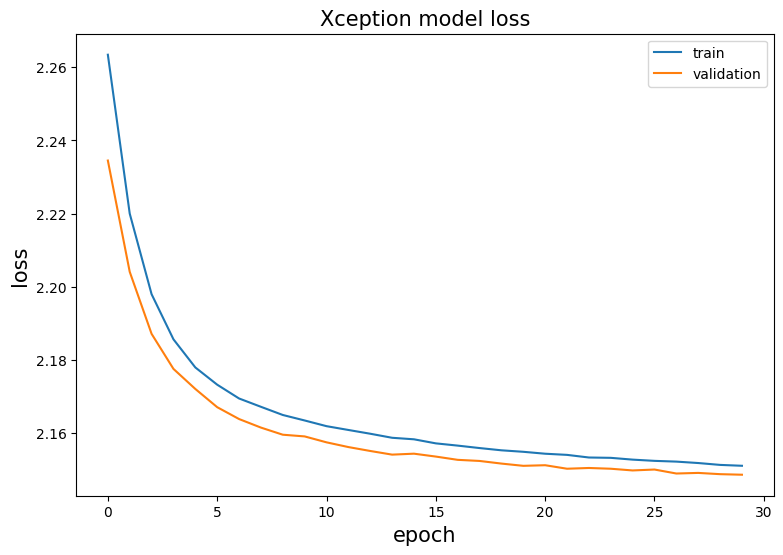

In [12]:
# Loss
plt.figure(figsize = (9, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Xception model loss', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.xlabel('epoch', fontsize = 15)
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

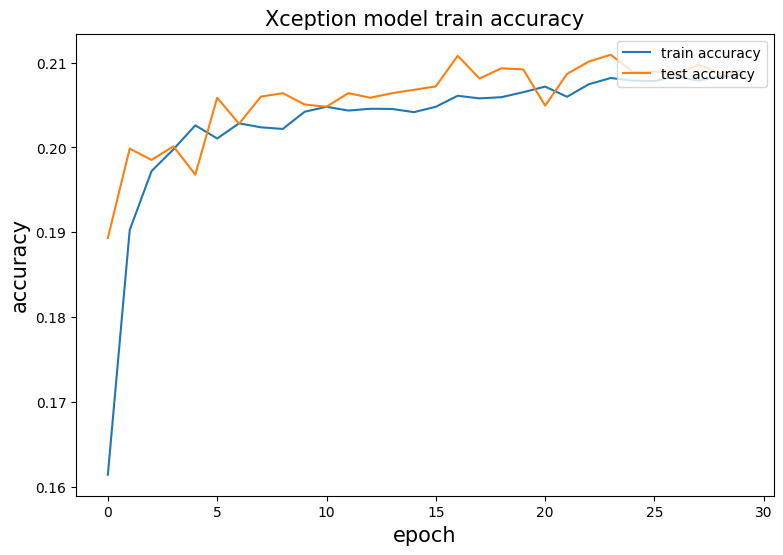

In [13]:
# Accuracy
plt.figure(figsize = (9, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Xception model train accuracy', fontsize = 15)
plt.xlabel('epoch', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
plt.legend(['train accuracy', 'test accuracy'], loc = 'upper right')
plt.show()

In [14]:
predictions = model.predict(test_images)

In [15]:
test_labels = np.argmax(test_labels, axis = 1)
test_labels

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [16]:
train_images = train_images.reshape(train_images.shape[0], w, h, 3)
test_images = test_images.reshape(test_images.shape[0], w, h, 3)


# Cifar's label need to reshape to scalar array
test_labels = test_labels.reshape(10000, )



# Helper functions to plot images 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classess_text[predicted_label],
                                100*np.max(predictions_array),
                                classess_text[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

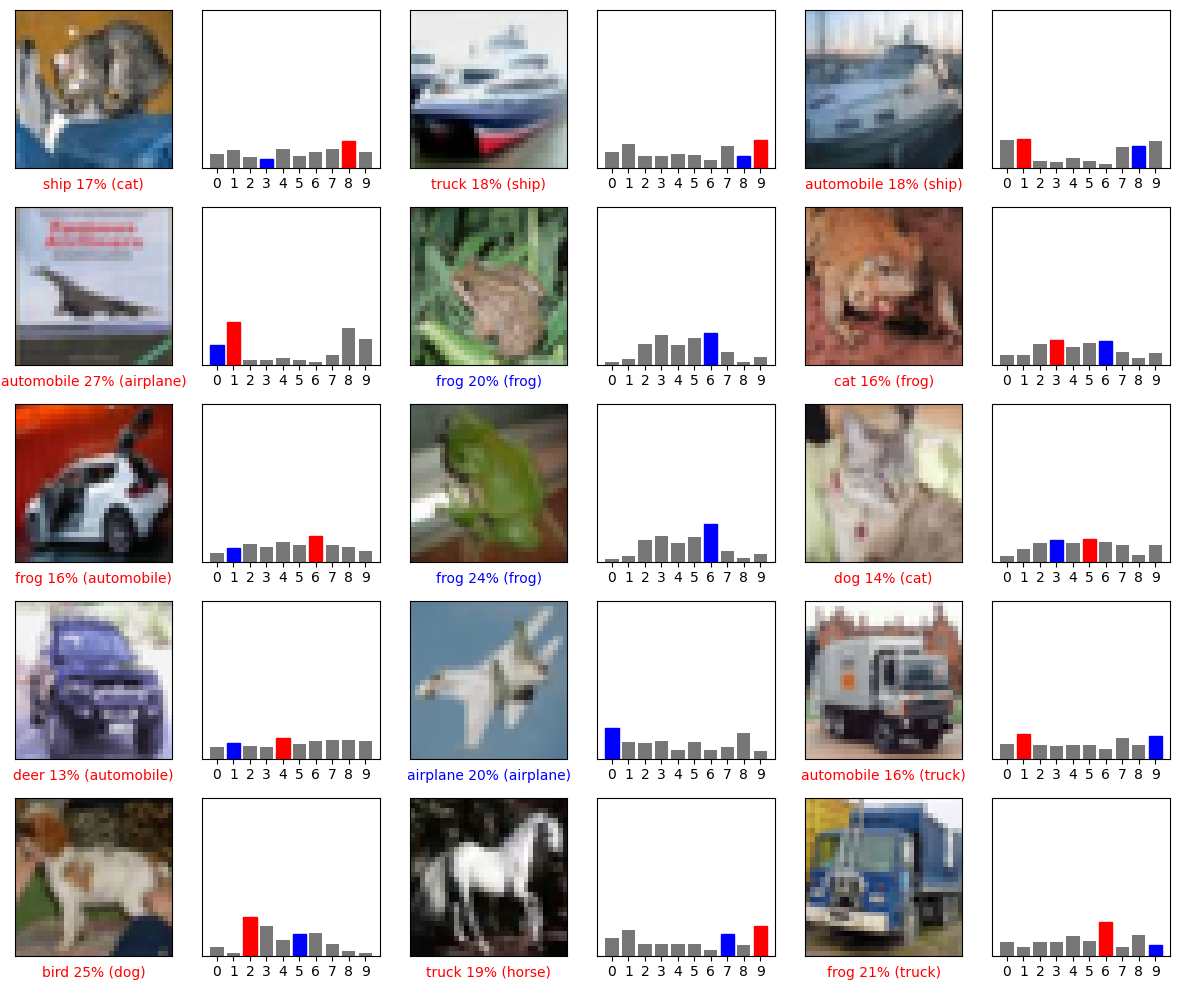

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Fine-Tuning Model

In [23]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-85]:
  layer.trainable = False

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), 
              metrics=["accuracy"])

In [24]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 True
1 conv1 True
2 conv1_bn True
3 conv1_relu True
4 conv_dw_1 True
5 conv_dw_1_bn True
6 conv_dw_1_relu True
7 conv_pw_1 True
8 conv_pw_1_bn True
9 conv_pw_1_relu True
10 conv_pad_2 True
11 conv_dw_2 True
12 conv_dw_2_bn True
13 conv_dw_2_relu True
14 conv_pw_2 True
15 conv_pw_2_bn True
16 conv_pw_2_relu True
17 conv_dw_3 True
18 conv_dw_3_bn True
19 conv_dw_3_relu True
20 conv_pw_3 True
21 conv_pw_3_bn True
22 conv_pw_3_relu True
23 conv_pad_4 True
24 conv_dw_4 True
25 conv_dw_4_bn True
26 conv_dw_4_relu True
27 conv_pw_4 True
28 conv_pw_4_bn True
29 conv_pw_4_relu True
30 conv_dw_5 True
31 conv_dw_5_bn True
32 conv_dw_5_relu True
33 conv_pw_5 True
34 conv_pw_5_bn True
35 conv_pw_5_relu True
36 conv_pad_6 True
37 conv_dw_6 True
38 conv_dw_6_bn True
39 conv_dw_6_relu True
40 conv_pw_6 True
41 conv_pw_6_bn True
42 conv_pw_6_relu True
43 conv_dw_7 True
44 conv_dw_7_bn True
45 conv_dw_7_relu True
46 conv_pw_7 True
47 conv_pw_7_bn True
48 conv_pw_7_relu True
49 conv_dw_8 True
5

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, None, None, 1024)  3228864   
_________________________________________________________________
global_average_pooling_layer (None, 1024)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                10250     
Total params: 3,239,114
Trainable params: 3,217,226
Non-trainable params: 21,888
_________________________________________________________________


In [26]:
for layer in model.layers:
  print(layer.trainable)

True
True
True
True


In [27]:
history_tunning = model.fit(train_images, 
                    train_labels,
                    batch_size = 256,
                    validation_split=0.15,
                    epochs = 30
)

Epoch 1/30
167/167 [==============================] - 7s 23ms/step - loss: 4.9163 - accuracy: 0.3484 - val_loss: 2.5557 - val_accuracy: 0.2836
Epoch 2/30
167/167 [==============================] - 3s 19ms/step - loss: 1.8343 - accuracy: 0.5144 - val_loss: 1.7179 - val_accuracy: 0.4677
Epoch 3/30
167/167 [==============================] - 3s 19ms/step - loss: 1.3333 - accuracy: 0.5811 - val_loss: 1.5053 - val_accuracy: 0.5508
Epoch 4/30
167/167 [==============================] - 3s 19ms/step - loss: 1.1221 - accuracy: 0.6276 - val_loss: 1.4397 - val_accuracy: 0.5769
Epoch 5/30
167/167 [==============================] - 3s 19ms/step - loss: 1.0468 - accuracy: 0.6451 - val_loss: 1.3093 - val_accuracy: 0.5923
Epoch 6/30
167/167 [==============================] - 3s 20ms/step - loss: 0.9597 - accuracy: 0.6676 - val_loss: 1.2560 - val_accuracy: 0.6117
Epoch 7/30
167/167 [==============================] - 3s 19ms/step - loss: 0.9452 - accuracy: 0.6728 - val_loss: 1.2029 - val_accuracy: 0.6189

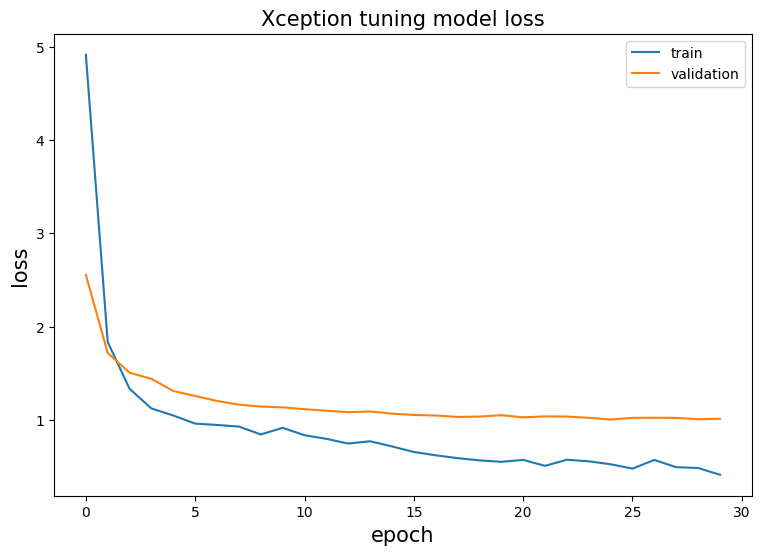

In [32]:
# Loss
plt.figure(figsize = (9, 6))
plt.plot(history_tunning.history['loss'])
plt.plot(history_tunning.history['val_loss'])
plt.title('Xception tuning model loss', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.xlabel('epoch', fontsize = 15)
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

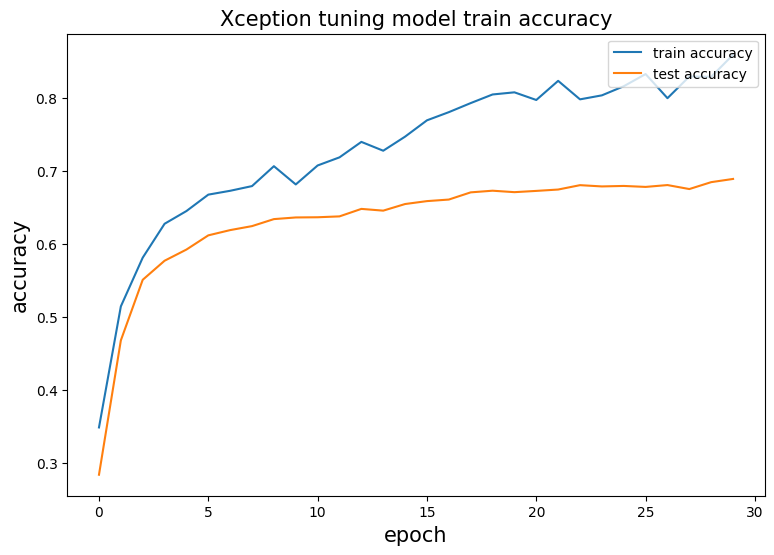

In [33]:
# Accuracy
plt.figure(figsize = (9, 6))
plt.plot(history_tunning.history['accuracy'])
plt.plot(history_tunning.history['val_accuracy'])
plt.title('Xception tuning model train accuracy', fontsize = 15)
plt.xlabel('epoch', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
plt.legend(['train accuracy', 'test accuracy'], loc = 'upper right')
plt.show()

In [30]:
predictions = model.predict(test_images)

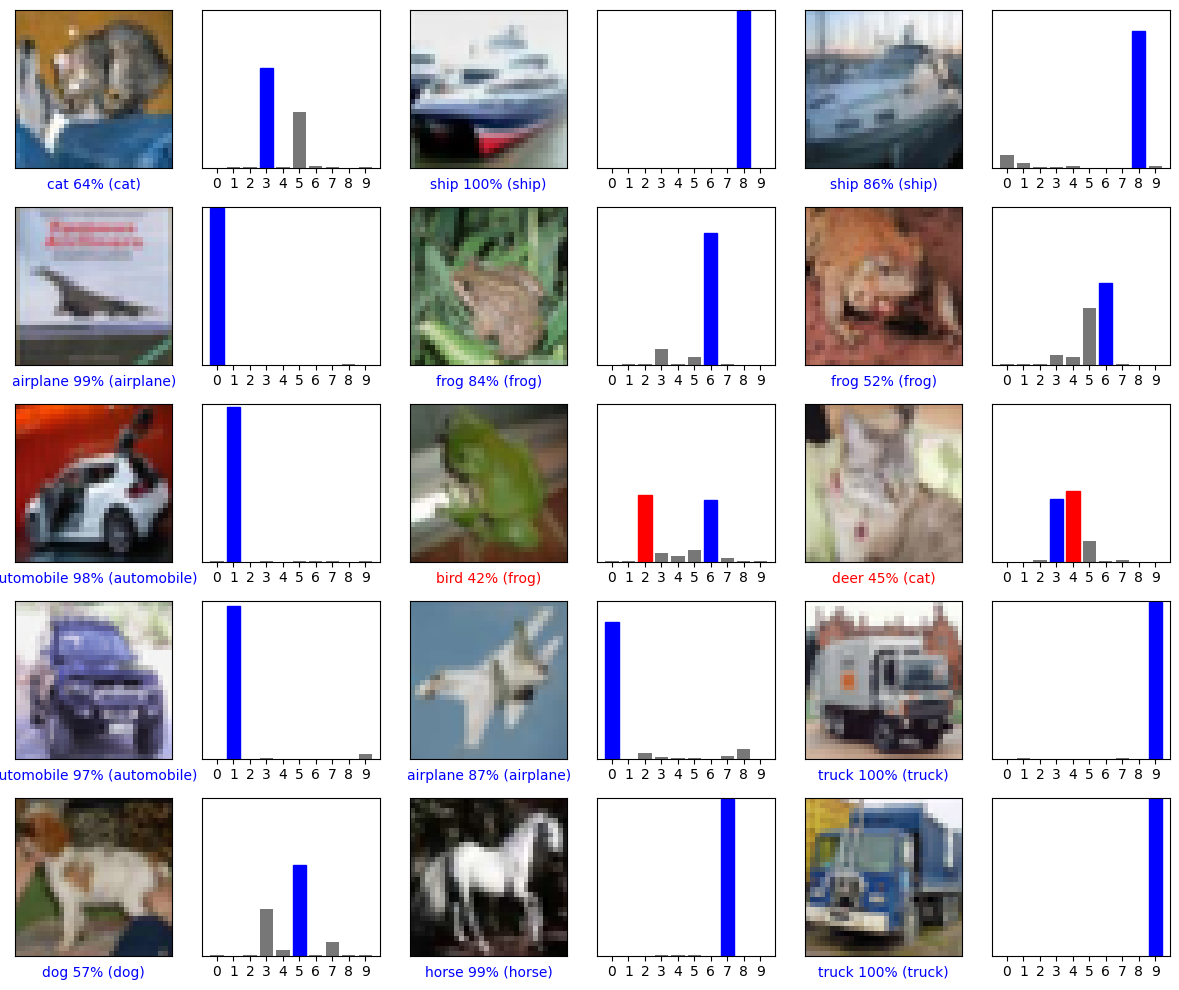

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()